In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import ipywidgers as widgets


In [2]:
file = 'Documents/fortran/n_body.txt'
df = pd.read_csv('n_body.txt', header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )

/tmp/ipykernel_2482/1620980189.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('n_body.txt', header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )


In [40]:
mass = df['mass']
x_positions = df['x']
y_positions = df['y']
z_positions = df['z']

x_acceleration = df['ax']
y_acceleration = df['ay']
z_acceleration = df['az']

N = len(np.unique(mass))
N_x_positions = [[] for _ in range(N)]
N_y_positions = [[] for _ in range(N)]
N_z_positions = [[] for _ in range(N)]

for i in range(len(x_positions)):
    mass_index = np.where(mass[i] == np.unique(mass))[0][0]
    N_x_positions[mass_index].append(x_positions[i])
    N_y_positions[mass_index].append(y_positions[i])
    N_z_positions[mass_index].append(z_positions[i])

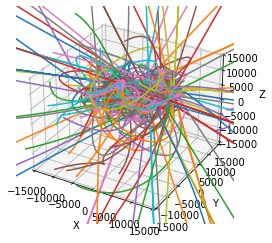

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

lim = 15e3

ax.set_xlim([-lim, lim ])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

for i in range(N):  
    x = N_x_positions[i]
    y = N_y_positions[i]
    z = N_z_positions[i]
    ax.plot3D(x, y, z)

plt.show()

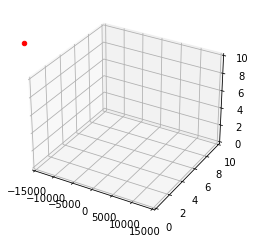

<class 'list'>


In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = N_x_positions[0]
y = N_y_positions[0]
z = N_z_positions[0]
lim = 15e3


ax.set_xlim([-lim, lim ])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

# Create the scatter plot
scat = ax.scatter(x[0], y[0], z[0], c='r', marker='o')  # Example initial point (x=1, y=2, z=3)
#x = np.linspace(0, 10, num=100)  # Example x values

# Modify the animate function to handle 3D coordinates
def animate(i):
    scat._offsets3d = ([x[i]], [y[i], [8])  
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True, frames=len(x) - 1, interval=50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
ani.save('scatter_3d.gif', writer=writer)

plt.show()

/tmp/ipykernel_2482/1199852680.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


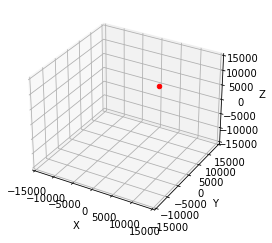

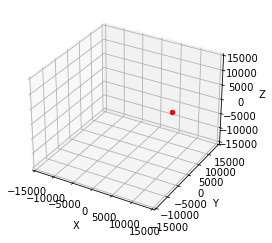

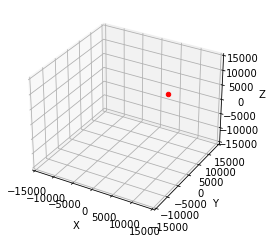

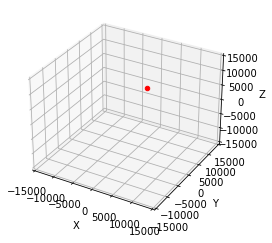

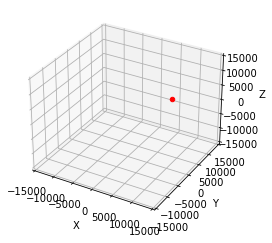

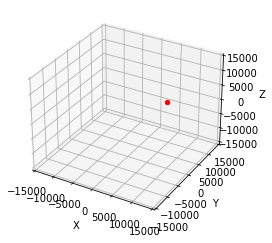

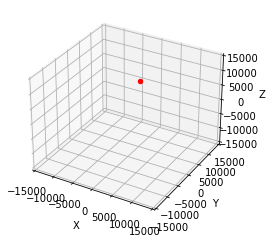

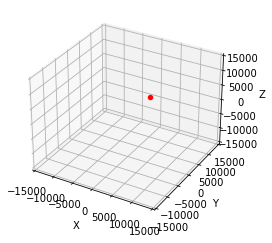

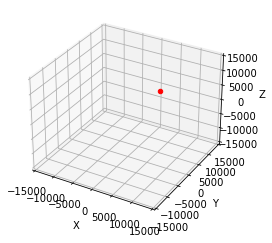

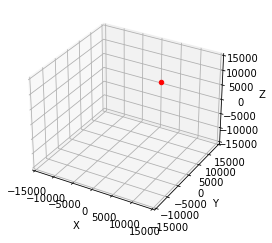

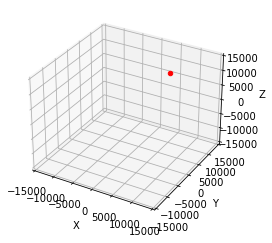

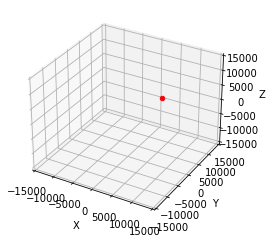

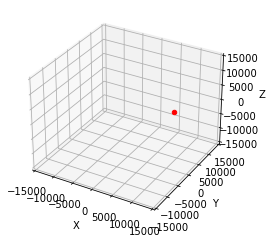

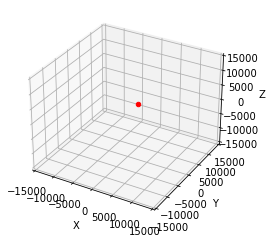

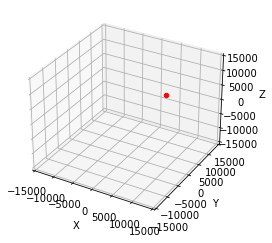

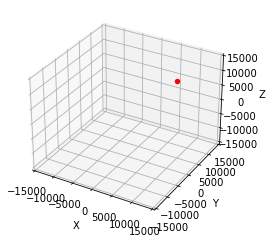

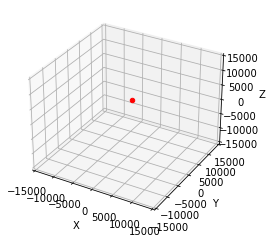

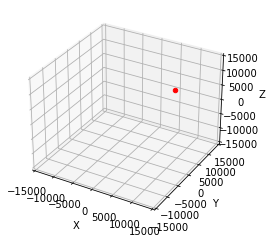

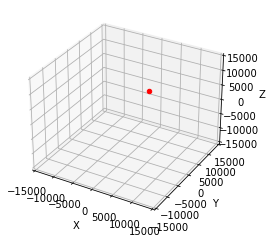

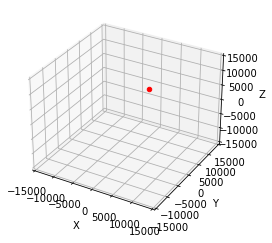

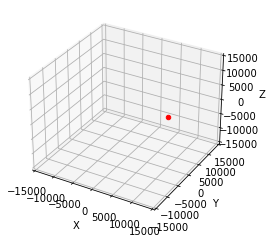

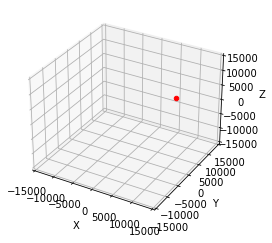

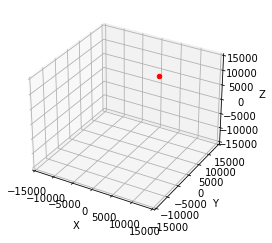

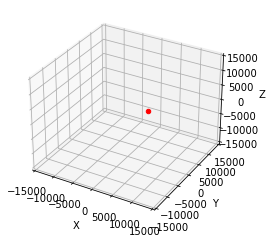

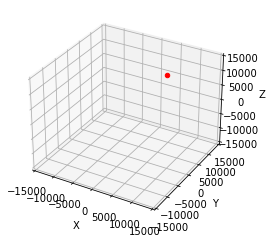

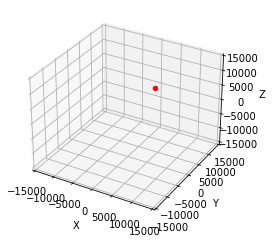

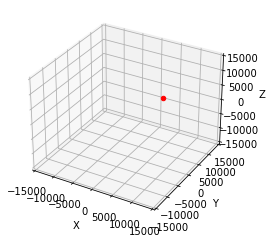

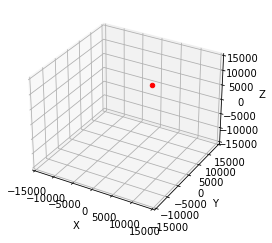

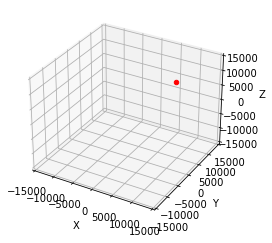

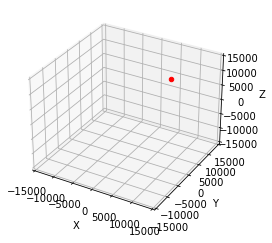

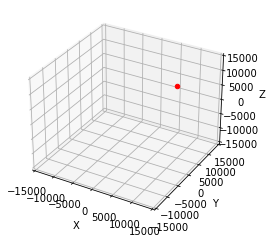

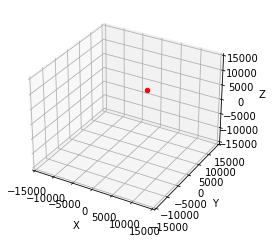

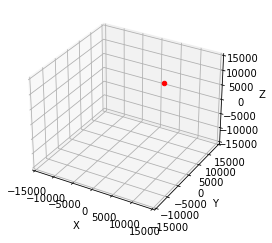

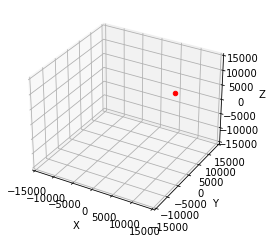

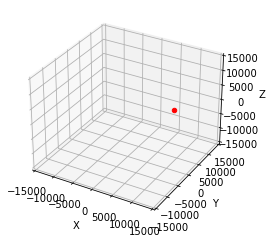

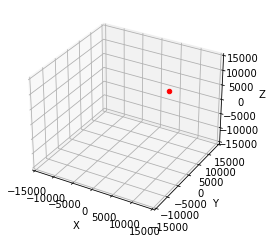

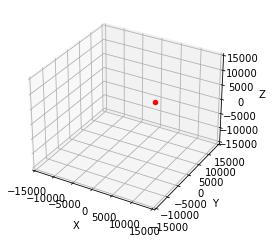

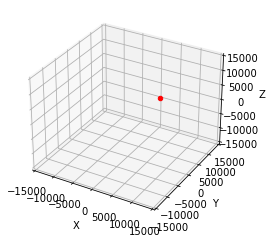

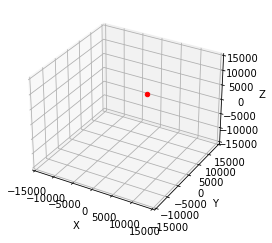

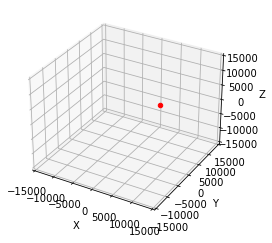

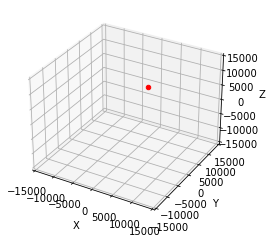

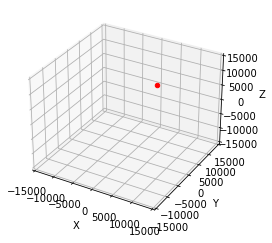

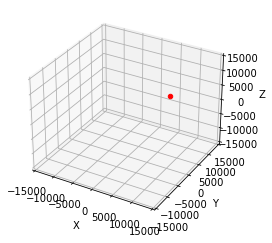

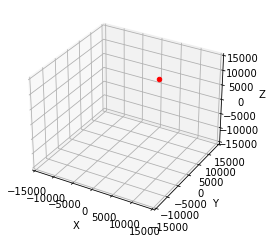

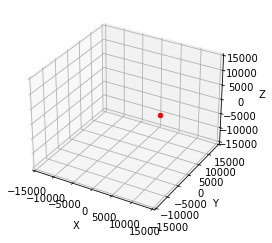

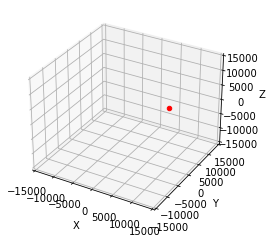

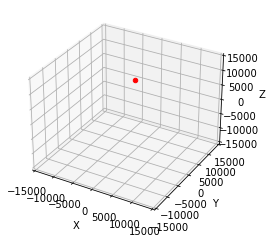

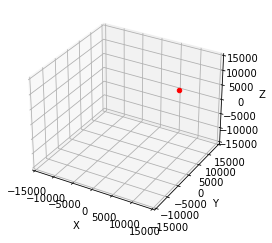

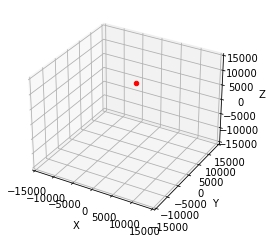

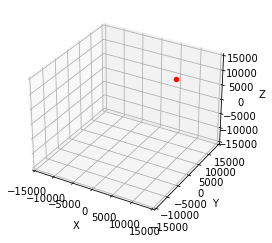

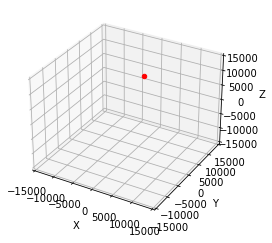

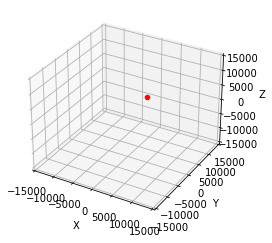

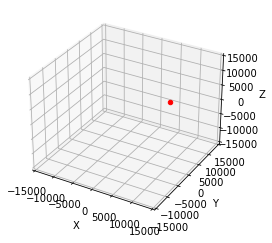

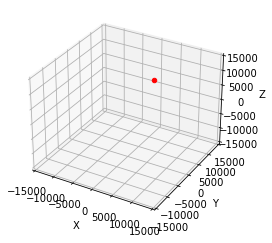

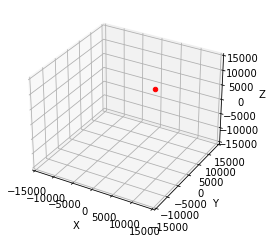

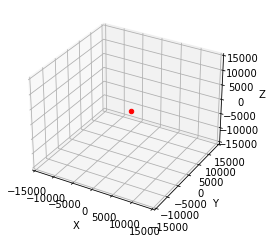

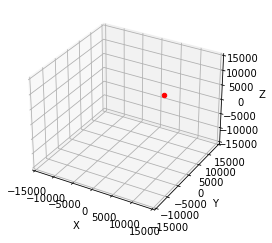

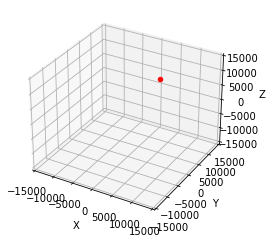

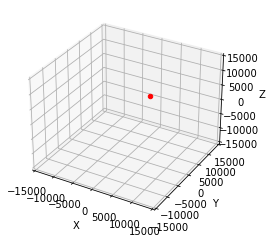

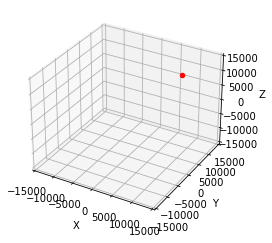

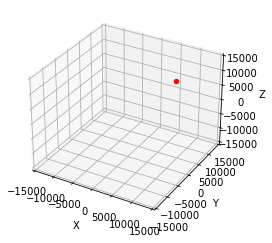

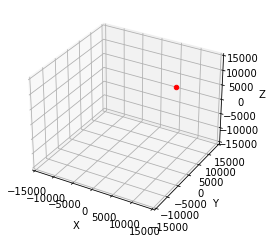

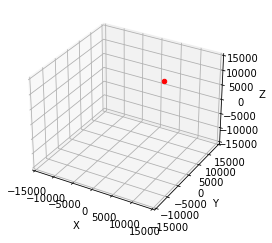

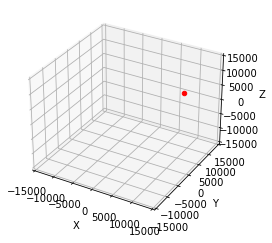

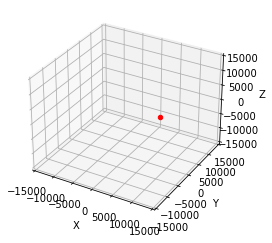

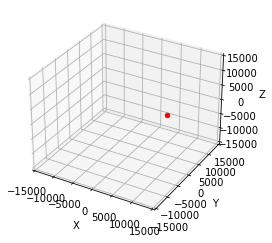

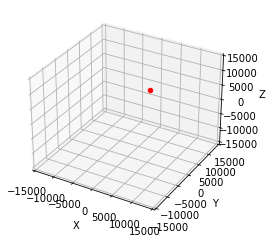

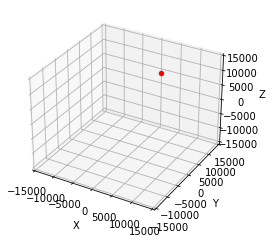

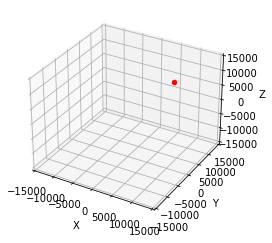

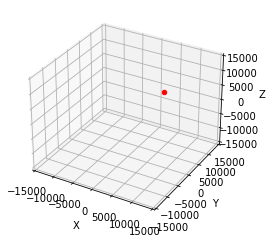

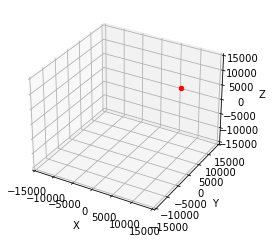

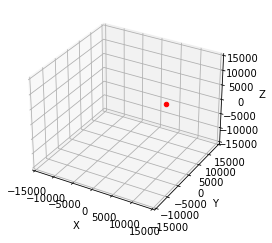

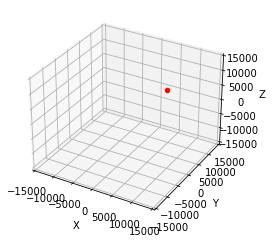

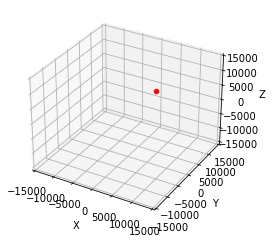

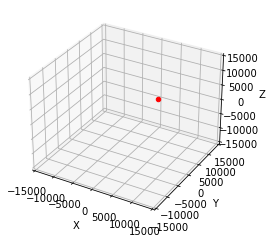

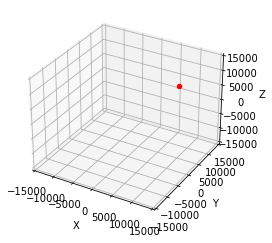

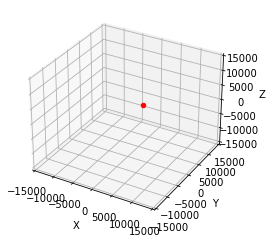

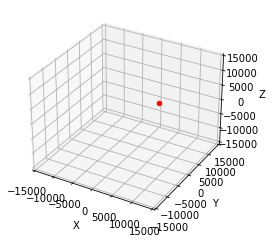

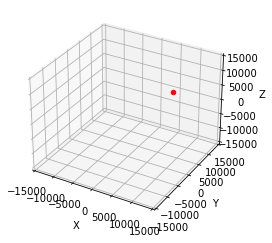

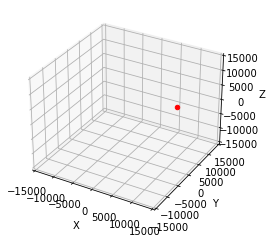

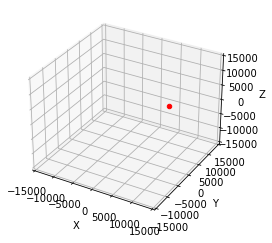

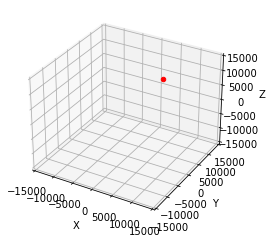

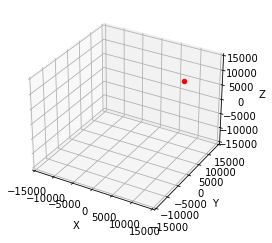

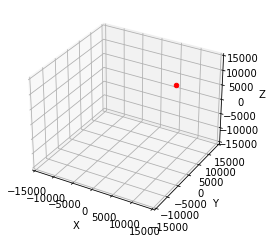

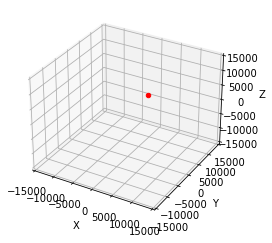

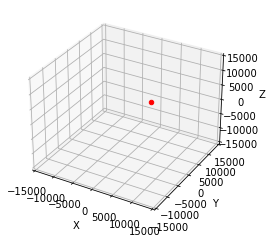

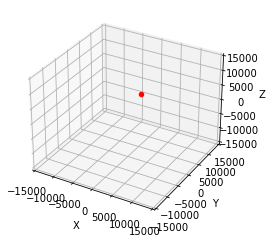

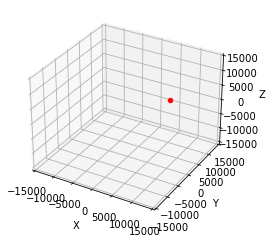

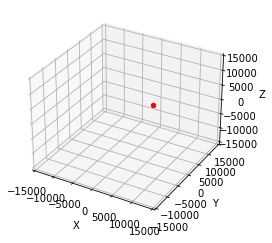

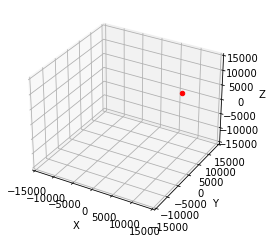

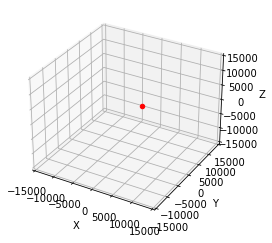

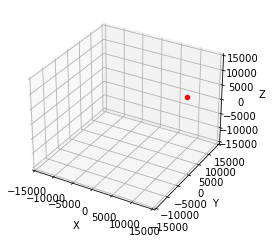

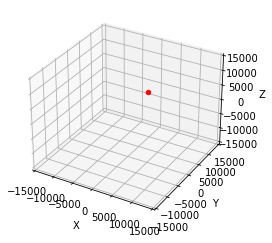

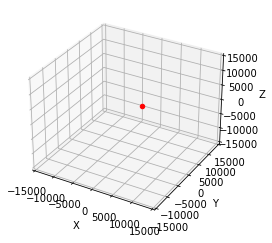

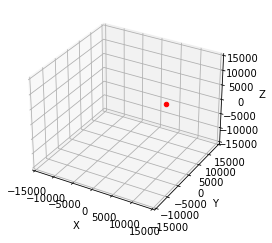

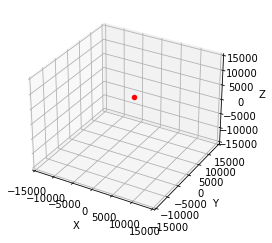

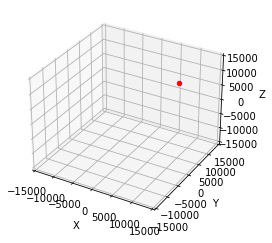

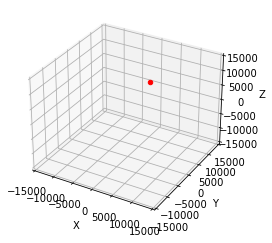

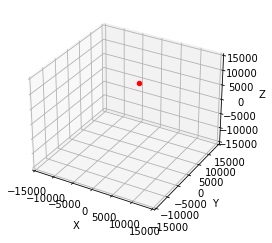

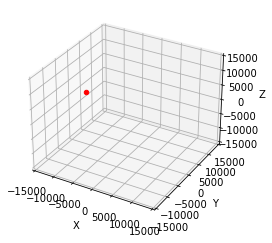

In [76]:
x = N_x_positions[0]
y = N_y_positions[0]
z = N_z_positions[0]

x=np.array(x)
y=np.array(y)
z=np.array(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

lim = 15e3

ax.set_xlim([-lim, lim ])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

scat = ax.scatter(x[0], y[0], z[0], c='r', marker='o')
def animate(i):
    scat._offsets3d = ([x[i]],[y[i]],[z[i]])
    return scat,
    
ani = animation.FuncAnimation(fig, animate, repeat=True, frames= len(x) - 1, interval = 50)

writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
ani.save('n_body.gif', writer=writer)

plt.show()

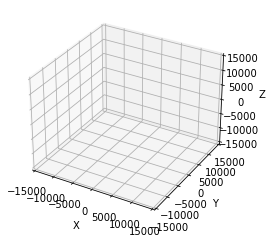

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

lim = 15e3

ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

# Initialize an empty scatter plot
scat = ax.scatter([], [], [], c='r', marker='o')

def init():
    scat.set_offsets(np.empty((0, 3)))  # Initialize empty data for scatter plot
    return scat,

def animate(i):
    positions = []  # List to store positions of all particles in this frame
    for particle_x, particle_y, particle_z in zip(N_x_positions, N_y_positions, N_z_positions):
        positions.append([particle_x[i], particle_y[i], particle_z[i]])
    
    scat.set_offsets(positions)  # Update scatter plot data
    return scat,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(N_x_positions[0]), interval=50, blit=True)

writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('n_body.gif', writer=writer)

plt.show()

In [72]:
x = N_x_positions[0][0]
print(x)

3966.38672
